# Importing libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data

In [6]:
df=pd.read_csv("Advertising.csv")

In [7]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

# data overview

In [8]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [9]:
df.describe()

TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# exploratory data analysis(data visualization)

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

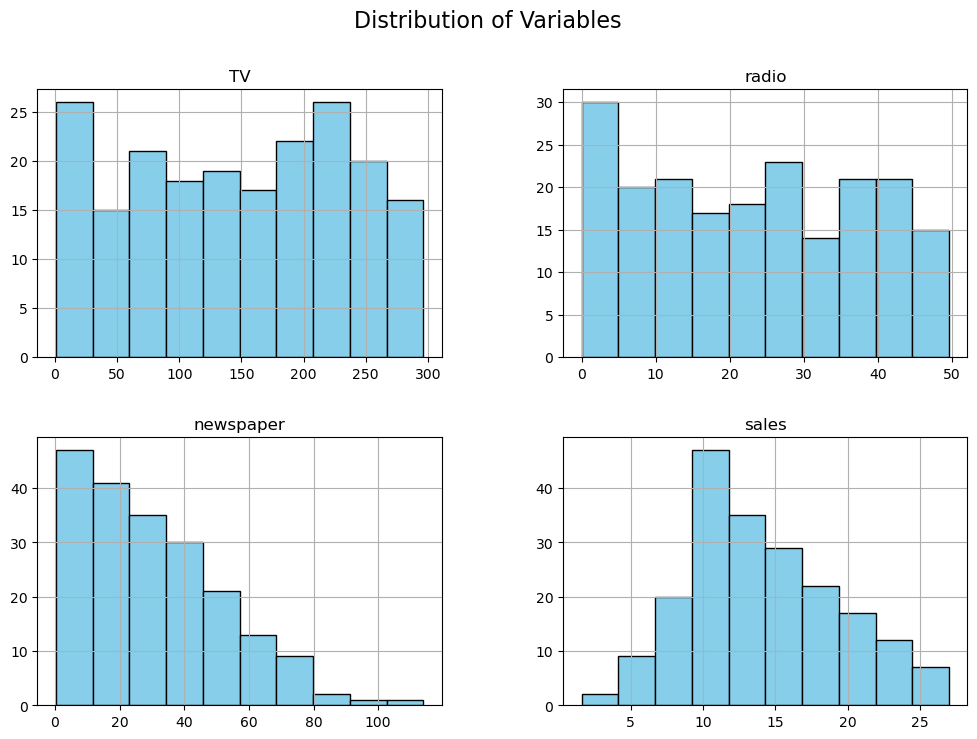

In [14]:
df.hist(bins=10, figsize=(12, 8), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Variables", fontsize=16)
plt.show()

Text(0, 0.5, 'Sales')

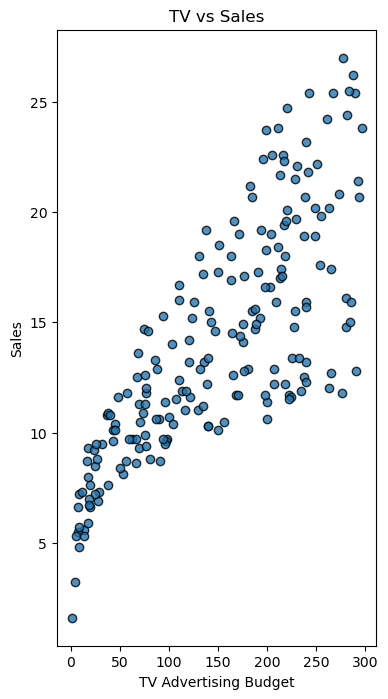

In [16]:
plt.figure(figsize=(14, 8))

# TV vs Sales
plt.subplot(1, 3, 1)
plt.scatter(df["TV"], df["sales"], alpha=0.8, edgecolor="k")
plt.title("TV vs Sales")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")

Text(0.5, 0, 'Radio Advertising Budget')

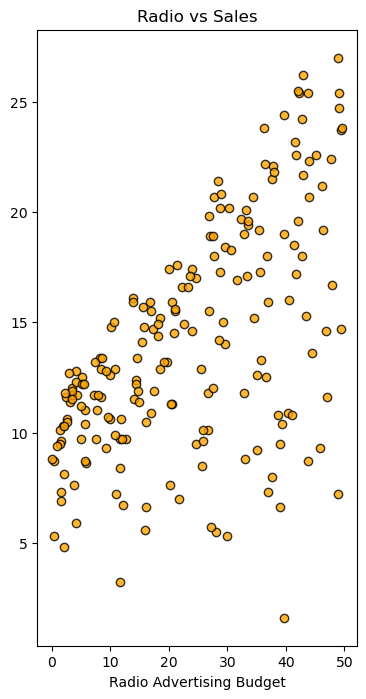

In [18]:
plt.figure(figsize=(14, 8))
# Radio vs Sales
plt.subplot(1, 3, 2)
plt.scatter(df["radio"], df["sales"], alpha=0.8, edgecolor="k", color="orange")
plt.title("Radio vs Sales")
plt.xlabel("Radio Advertising Budget")

Text(0.5, 0, 'Newspaper Advertising Budget')

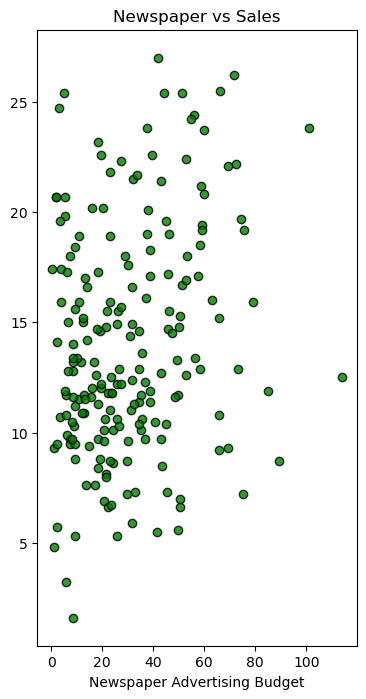

In [19]:
plt.figure(figsize=(14, 8))
# Newspaper vs Sales
plt.subplot(1, 3, 3)
plt.scatter(df["newspaper"], df["sales"], alpha=0.8, edgecolor="k", color="green")
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper Advertising Budget")

# Features and Target 

In [20]:
X=df.drop("sales",axis=1)
y=df['sales']

In [21]:
X2=df[["TV","radio","newspaper"]]
X2

TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [22]:
X

TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

# Spliting dataset(Train and Test)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Train the model 

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model=LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

# predicting test data

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [30]:
pd.DataFrame({"Y_test":y_test,"Y_pred":y_pred}).head()

Y_test     Y_pred
37     14.7  15.741313
109    19.8  19.610626
31     11.9  11.448889
89     16.7  17.008198
66      9.5   9.172857

# Model evaluation 

In [31]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE,MSE,RMSE],index=["MAE","MSE","RMSE"],columns=["metrics"])

metrics
MAE   1.213746
MSE   2.298717
RMSE  1.516152

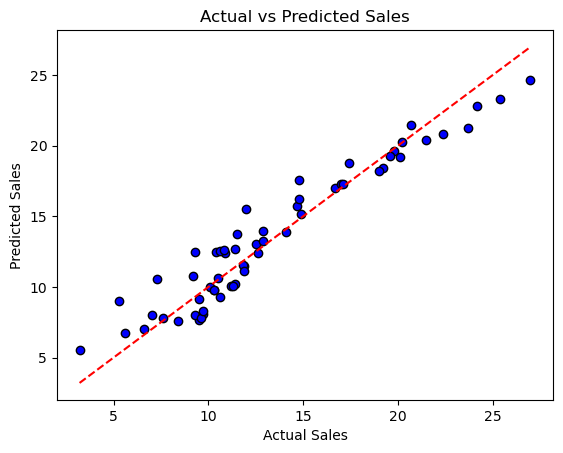

In [32]:
plt.scatter(y_test, y_pred, color="blue", edgecolor="k")  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Saving Model

In [33]:
from joblib import dump, load

In [34]:
final_ad=LinearRegression()
final_ad.fit(X,y)
dump(final_ad,r"C:\Users\ASUS\Desktop\AIoT\domain-datasets\4-Linear regression\saving\AD_model.joblib")


['C:\\Users\\ASUS\\Desktop\\AIoT\\domain-datasets\\4-Linear regression\\saving\\AD_model.joblib']

# Load the Model

In [36]:
load_model=load(r"C:\Users\ASUS\Desktop\AIoT\domain-datasets\4-Linear regression\saving\AD_model.joblib")

In [40]:
ads=[[130,60,20]]
#tv radio newspaper

In [38]:
load_model.predict(ads)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20.17934443])